# Film Flix Database Statistics

In [6]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import required packages
Retrieve data from the API in json file

In [7]:
response = requests.get("https://filmflixrestapi.onrender.com/api/films")
data = response.json()

Read the retrieved json into a pandas dataframe
Print the first 5 lines of the data frame
Print the last 5 lines of the data frame

In [8]:
url = "https://filmflixrestapi.onrender.com/api/films"
df = pd.read_json(url) 
print(df.head())
print(df.tail())

   duration   genre  id rating                 title  year_released
0       109  Action   2     PG  The Legend of Tarzan           2016
1       123  Action   3     PG          Jason Bourne           2016
2       116   Crime   4      R         The Nice Guys           2016
3       120  Action   6     PG      Star Trek Beyond           2016
4       151  Action   7     PG     Batman v Superman           2016
    duration      genre  id rating               title  year_released
34       200      SciFi  38     15  2010 Space Odyssey           1984
35       112  animation  44     12       The Lost City           2022
36       112    changed  45     12       The Lost City           2022
37       112       test  46     12       The Lost City           2022
38       112       test  47     12       The Lost City           2022


### Films by Year

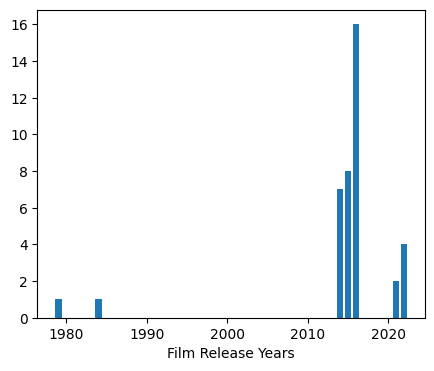

In [9]:
year = df['year_released']

values, counts = np.unique(year, return_counts=True)

ax1 = plt.figure(figsize=(5,4))
ax1 = plt.bar(values, counts)
ax1 = plt.xlabel("Film Release Years")

plt.show()

Most of the films are modern, created between 2010 and 2020.

### Films split by Genre

Text(0.5, 1.0, "Genre's in Film Flix Database")

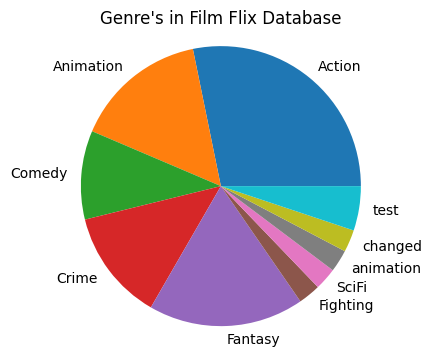

In [10]:
genre = df['genre']
values, counts = np.unique(genre, return_counts=True)

plt.figure(figsize=(5,4))
plt.pie(counts, labels=values)
plt.axis('equal')
plt.title("Genre's in Film Flix Database")

There are very few SciFi movies available.

### How long are the movies?

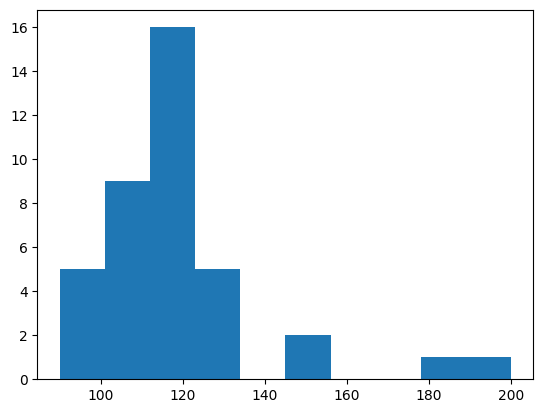

In [11]:
duration = df['duration']
plt.hist(duration, bins=10)
plt.show()

Most movies are around 2hrs long.

#### Are movies in 2023 longer than those created in previous years?

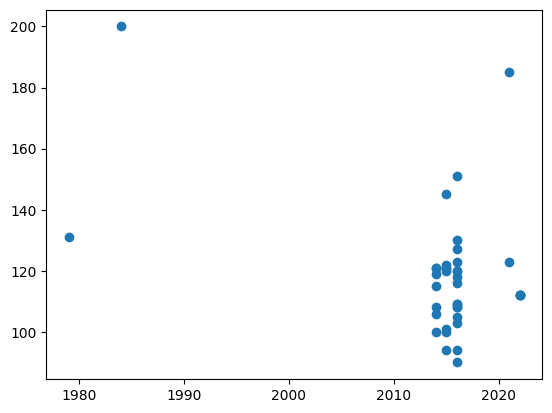

In [12]:
plt.scatter(year, duration)
plt.show()

The database does contain a couple of epics; Space Odessy and Babylon!

### Films by Rating

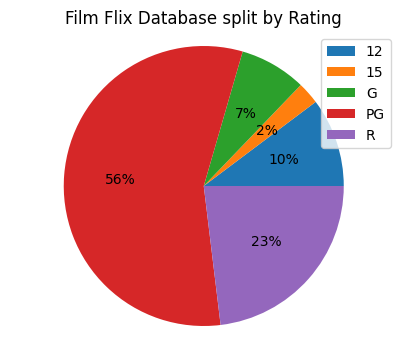

In [13]:
rating = df['rating']
values, counts = np.unique(rating, return_counts=True)

plt.figure(figsize=(5,4))
plt.pie(counts, autopct='%d%%')
plt.axis('equal')
plt.title("Film Flix Database split by Rating")
plt.legend(values, loc='upper right')

This movie database is primarily designed for family viewing.